In [1]:
import scipy.linalg as la
from math_functions.Get_state_index import Get_State_index
from main_grape.Grape import Grape
%pylab inline
import random as rd
import time
from IPython import display

from math_functions.c_to_r_mat import CtoRMat

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Defining time scales
total_time = 1.0
steps = 100


#Defining H0

H0 = np.zeros([4,4])
       

#Defining Forbidden sates

#states_forbidden_list = []

#Defining Concerned states (starting states)
psi0 = [0,1,2,3]

#Defining states to include in the drawing of occupation
states_draw_list = [0,1,2,3]
states_draw_names = ['00','01','10','11']

#Defining U (Target)

#U= iswap().full()
U = np.zeros([4,4],dtype=complex)
U[0,0]=1
U[1,2] = 0+1j
U[2,1] = 0+1j
U[3,3] = 1

#Defining U0 (Initial)
q_identity = np.identity(4)
U0= q_identity

#Defining control Hs
Q_x   = np.diag(np.sqrt(np.arange(1,2)),1)+np.diag(np.sqrt(np.arange(1,2)),-1)
Q_y   = (0+1j) *(np.diag(np.sqrt(np.arange(1,2)),1)-np.diag(np.sqrt(np.arange(1,2)),-1))
Q_z   = np.diag(np.arange(0,2))

Q_xx = np.kron(Q_x,Q_x)
Q_yy = np.kron(Q_y,Q_y)
Q_zz = np.kron(Q_z,Q_z)

Hops = [Q_xx,Q_yy,Q_zz]
ops_max_amp = [4.0,4.0, 2*np.pi*2.0]
Hnames =['xx','yy', 'zz']
H_time_scales = {'0':0.05, '1': 0.2}

#Defining convergence parameters
max_iterations = 5000
decay = max_iterations/2
convergence = {'rate':0.05, 'update_step':50, 'max_iterations':max_iterations,\
               'conv_target':1e-8,'learning_rate_decay':decay}
reg_coeffs = {'alpha' : 0, 'z':0, 'dwdt':0,'d2wdt2':0, 'inter':0}
#multi_mode = {'dressed':dressed, 'vectors':v_c, 'qnum':qubit_state_num, 'mnum': mode_state_num,\
              #'f':freq_ge, 'es':w_c, 'g1':qm_g1, 'D':D, 'Interpolation':True, 'Modulation':True}
print U


[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+1.j  0.+0.j]
 [ 0.+0.j  0.+1.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]]


(array([[-0.75317371, -0.7522245 , -0.75271231, -0.75177145, -0.75143826,
         -0.75238991, -0.75410813, -0.75849605, -0.76297081, -0.76701176,
         -0.76978815, -0.77260804, -0.77539068, -0.77779567, -0.77986163,
         -0.78206295, -0.784661  , -0.78801692, -0.79081756, -0.79348361,
         -0.79712713, -0.79944241, -0.80095869, -0.80239749, -0.80330342,
         -0.80355072, -0.80396736, -0.80472255, -0.80550259, -0.80525577,
         -0.80516648, -0.80478227, -0.80327302, -0.80217117, -0.80099636,
         -0.79905468, -0.79719532, -0.7956925 , -0.79427081, -0.79232377,
         -0.79177547, -0.79010504, -0.78772354, -0.78427023, -0.78044164,
         -0.77683133, -0.77374655, -0.77146578, -0.76967084, -0.76891619,
         -0.76761705, -0.76623559, -0.76470029, -0.76268822, -0.7610411 ,
         -0.75972712, -0.75747973, -0.75626439, -0.75668484, -0.75647289,
         -0.75699812, -0.75862545, -0.75931674, -0.75991744, -0.76147944,
         -0.76282001, -0.76421279, -0.

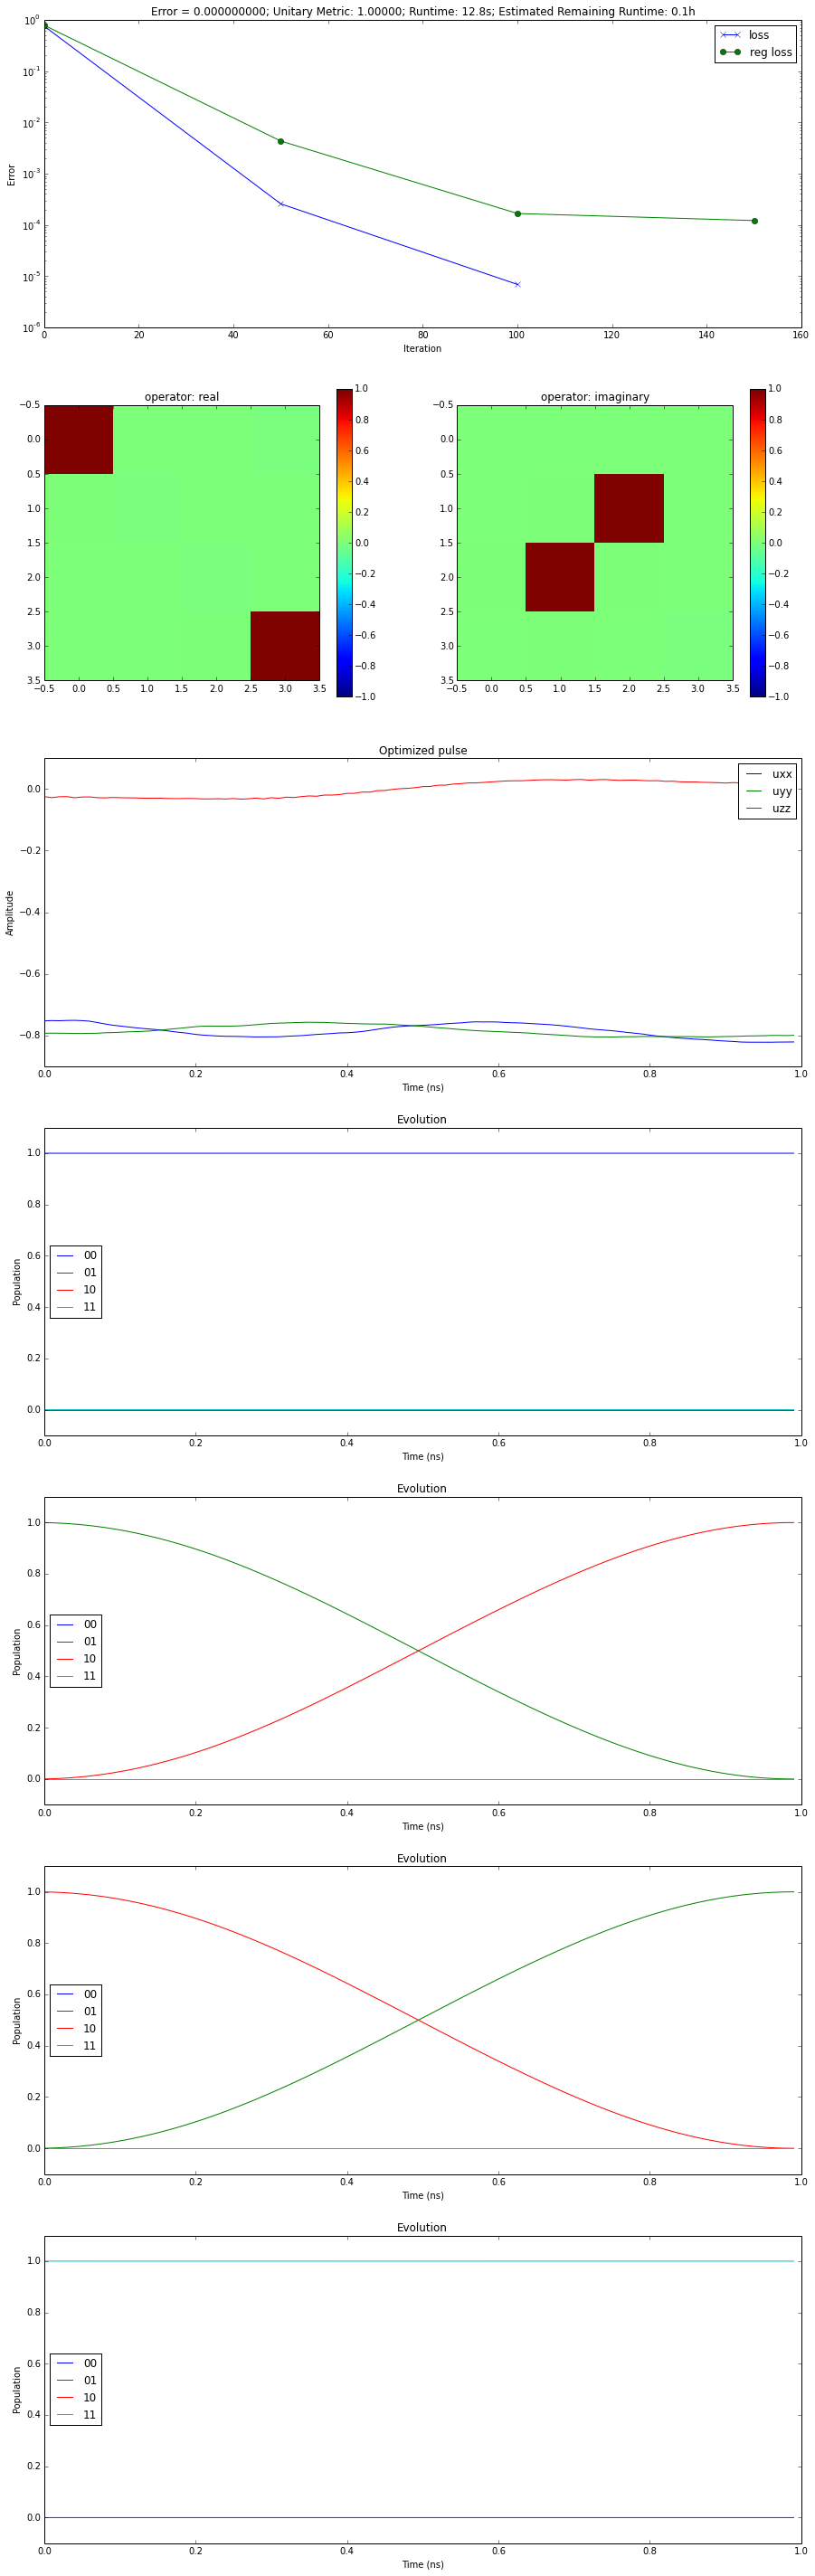

In [3]:
 #Extra options
#reg_coeffs = reg_coeffs,draw = [states_draw_list,states_draw_names] ,forbidden = states_forbidden_list,multi_mode = multi_mode,
#maxA = ops_max_amp,use_gpu = True
Grape(H0,Hops,Hnames,U,U0,total_time,steps,psi0,convergence, draw = [states_draw_list,states_draw_names] ,  maxA = ops_max_amp, use_gpu=True)